In [1]:
from deepuq.analyze.analyze import AggregateCheckpoints
from deepuq.models.models import model_setup_DER, model_setup_DE
from deepuq.data.data import DataPreparation
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset
import pandas as pd
import seaborn as sns

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoints = AggregateCheckpoints()

In [3]:
uniform = True
norm = False
verbose = False
epoch = 99
out_dir = '../DeepUQResources/'

In [4]:
experiments_df = {
    "DE, 0D, input, low": {
        "model": "DE",
        "size_df": 10000,
        "noise": "low",
        "dim": "0D",
        "injection": "input"
    },
    "DE, 0D, input, medium": {
        "model": "DE",
        "size_df": 10000,
        "noise": "medium",
        "dim": "0D",
        "injection": "input"
    },
    "DE, 0D, input, high": {
        "model": "DE",
        "size_df": 10000,
        "noise": "high",
        "dim": "0D",
        "injection": "input"
    },
    "DE, 0D, output, low": {
        "model": "DE",
        "size_df": 10000,
        "noise": "low",
        "dim": "0D",
        "injection": "output"
    },
    "DE, 0D, output, medium": {
        "model": "DE",
        "size_df": 10000,
        "noise": "medium",
        "dim": "0D",
        "injection": "output"
    },
    "DE, 0D, output, high": {
        "model": "DE",
        "size_df": 10000,
        "noise": "high",
        "dim": "0D",
        "injection": "output"
    },
    "DE, 2D, input, low": {
        "model": "DE",
        "size_df": 500,
        "noise": "low",
        "dim": "2D",
        "injection": "input"
    },
    "DE, 2D, input, medium": {
        "model": "DE",
        "size_df": 500,
        "noise": "medium",
        "dim": "2D",
        "injection": "input"
    },
    "DE, 2D, input, high": {
        "model": "DE",
        "size_df": 500,
        "noise": "high",
        "dim": "2D",
        "injection": "input"
    },
    "DE, 2D, output, low": {
        "model": "DE",
        "size_df": 500,
        "noise": "low",
        "dim": "2D",
        "injection": "output"
    },
    "DE, 2D, output, medium": {
        "model": "DE",
        "size_df": 500,
        "noise": "medium",
        "dim": "2D",
        "injection": "output"
    },
    "DE, 2D, output, high": {
        "model": "DE",
        "size_df": 500,
        "noise": "high",
        "dim": "2D",
        "injection": "output"
    },
    "DER, 0D, input, low": {
        "model": "DER",
        "size_df": 10000,
        "noise": "low",
        "dim": "0D",
        "injection": "input"
    },
    "DER, 0D, input, medium": {
        "model": "DER",
        "size_df": 10000,
        "noise": "medium",
        "dim": "0D",
        "injection": "input"
    },
    "DER, 0D, input, high": {
        "model": "DER",
        "size_df": 10000,
        "noise": "high",
        "dim": "0D",
        "injection": "input"
    },
    "DER, 0D, output, low": {
        "model": "DER",
        "size_df": 10000,
        "noise": "low",
        "dim": "0D",
        "injection": "output"
    },
    "DER, 0D, output, medium": {
        "model": "DER",
        "size_df": 10000,
        "noise": "medium",
        "dim": "0D",
        "injection": "output"
    },
    "DER, 0D, output, high": {
        "model": "DER",
        "size_df": 10000,
        "noise": "high",
        "dim": "0D",
        "injection": "output"
    },
    "DER, 2D, input, low": {
        "model": "DER",
        "size_df": 500,
        "noise": "low",
        "dim": "2D",
        "injection": "input"
    },
    "DER, 2D, input, medium": {
        "model": "DER",
        "size_df": 500,
        "noise": "medium",
        "dim": "2D",
        "injection": "input"
    },
    "DER, 2D, input, high": {
        "model": "DER",
        "size_df": 500,
        "noise": "high",
        "dim": "2D",
        "injection": "input"
    },
    "DER, 2D, output, low": {
        "model": "DER",
        "size_df": 500,
        "noise": "low",
        "dim": "2D",
        "injection": "output"
    },
    "DER, 2D, output, medium": {
        "model": "DER",
        "size_df": 500,
        "noise": "medium",
        "dim": "2D",
        "injection": "output"
    },
    "DER, 2D, output, high": {
        "model": "DER",
        "size_df": 500,
        "noise": "high",
        "dim": "2D",
        "injection": "output"
    },
}

In [17]:
n_models = 16
verbose = False

inject_type_list = ["output", "input"]
data_dim_list = ["0D", "2D"]
model_type = ["DE", "DER"]
noise_list = ["low", "medium", "high"]

mega_dict = {}

# Nested loops to fill the dictionary
for noise in noise_list:
    mega_dict[noise] = {}  # Create a sub-dictionary for each noise level
    for model in model_type:
        mega_dict[noise][model] = {}  # Create a sub-dictionary for each model type
        for dim in data_dim_list:
            mega_dict[noise][model][dim] = {}  # Create a sub-dictionary for each data dimension
            for inject_type in inject_type_list:
                mega_dict[noise][model][dim][inject_type] = []
print(mega_dict)

{'low': {'DE': {'0D': {'output': [], 'input': []}, '2D': {'output': [], 'input': []}}, 'DER': {'0D': {'output': [], 'input': []}, '2D': {'output': [], 'input': []}}}, 'medium': {'DE': {'0D': {'output': [], 'input': []}, '2D': {'output': [], 'input': []}}, 'DER': {'0D': {'output': [], 'input': []}, '2D': {'output': [], 'input': []}}}, 'high': {'DE': {'0D': {'output': [], 'input': []}, '2D': {'output': [], 'input': []}}, 'DER': {'0D': {'output': [], 'input': []}, '2D': {'output': [], 'input': []}}}}


In [18]:
for experiment_name, params in experiments_df.items():
    print(f"Experiment: {experiment_name}")
    #for key, value in params.items():
    #    print(f"Key, value pairs - {key}: {value}")
    chk = 0
    data = DataPreparation()
    x_test, y_test = data.generate_df(
                params["size_df"], params["noise"],
                params["dim"], params["injection"], uniform, verbose,
                rs_prior=42, rs_simulate_0D=41, rs_simulate_2D=41, rs_uniform=40)
    if verbose and params["dim"] == "0D":
        print(np.shape(x_test))
        plt.scatter(x_test[:,0], y_test)
        plt.show()
    if params["model"] == "DER":
        setupmodel, lossFn = model_setup_DER(
            params["model"], DEVICE, n_hidden=64, data_type=params["dim"])
        COEFF = 0.01
        try:
            chk = checkpoints.load_checkpoint(
                params["model"],
                params["injection"],
                params["dim"],
                params["noise"],
                epoch,
                DEVICE,
                path="../DeepUQResources/checkpoints/",
                COEFF=COEFF,
                loss="DER",
                load_rs_chk=True,
                rs=42
            )
        except FileNotFoundError:
            continue
        setupmodel.load_state_dict(chk.get("model_state_dict"))
        setupmodel.eval()
        y_pred = setupmodel(torch.Tensor(x_test)).detach().numpy()
        beta = y_pred[:, 3]
        nu = y_pred[:, 1]
        alpha = y_pred[:, 2]
        u_al = np.sqrt(abs(beta * (1 + nu) / (alpha * nu)))     
    elif params["model"] == "DE":
        models_used = 0
        loss = "bnll_loss"
        setupmodel, lossFn = model_setup_DE(
            loss, DEVICE, n_hidden=64, data_type=params["dim"])
        BETA = 0.5
        u_al = []
        for m in range(n_models):
            if models_used > 9:
                break
            chk = checkpoints.load_checkpoint(
                "DE",
                params["injection"],
                params["dim"],
                params["noise"],
                epoch,
                DEVICE,
                path="../DeepUQResources/checkpoints/",
                BETA=BETA,
                nmodel=m,
                load_rs_chk=True,
                rs=int(42+m)
            )
            try:
                setupmodel.load_state_dict(chk.get("model_state_dict"))
            except RuntimeError:
                print(chk)
            setupmodel.eval()
            y_pred = setupmodel(torch.Tensor(x_test)).detach().numpy()
            # for some reason if the model fails it predicts
            # really large values for sigma
            
            if np.all(y_pred[:, 1] == y_pred[0, 1]) or np.mean(np.sqrt(y_pred[:, 1])) > 0.2:
                # All values are the same
                print("All values in y_pred[:,1] are the same or they are really high")
                # then we need to skip this model
                print('not using this model ', m)
                continue
            else:
                '''
                plt.clf()
                plt.hist(np.sqrt(y_pred[:, 1]), bins=100)
                plt.title(f'model m {m}')
                plt.show()
                '''
                print('using this model', m)
                models_used += 1
                #print('using this model ', m)            
            u_al_one = np.sqrt(y_pred[:, 1])
            u_al.append(u_al_one)
        if models_used != 10:
            print('models used when all is said and done', models_used)
            STOP
    # populate the mega dict
    mega_dict[params["noise"]][params["model"]][params["dim"]][params["injection"]] = u_al

Experiment: DE, 0D, input, low


/Users/rnevin/Library/Caches/pypoetry/virtualenvs/deepuq-neurips-ws-2024-TMQ0mHE3-py3.10/lib/python3.10/site-packages/deepuq/data/data.py:202: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  df[key] = torch.tensor(value)


using this model 0
using this model 1
using this model 2
using this model 3
using this model 4
using this model 5
using this model 6
using this model 7
using this model 8
using this model 9
Experiment: DE, 0D, input, medium
using this model 0
using this model 1
using this model 2
using this model 3
using this model 4
using this model 5
using this model 6
using this model 7
using this model 8
using this model 9
Experiment: DE, 0D, input, high
using this model 0
using this model 1
using this model 2
using this model 3
using this model 4
using this model 5
using this model 6
using this model 7
using this model 8
using this model 9
Experiment: DE, 0D, output, low
using this model 0
using this model 1
using this model 2
using this model 3
using this model 4
using this model 5
using this model 6
using this model 7
using this model 8
using this model 9
Experiment: DE, 0D, output, medium
using this model 0
using this model 1
using this model 2
using this model 3
using this model 4
using this m

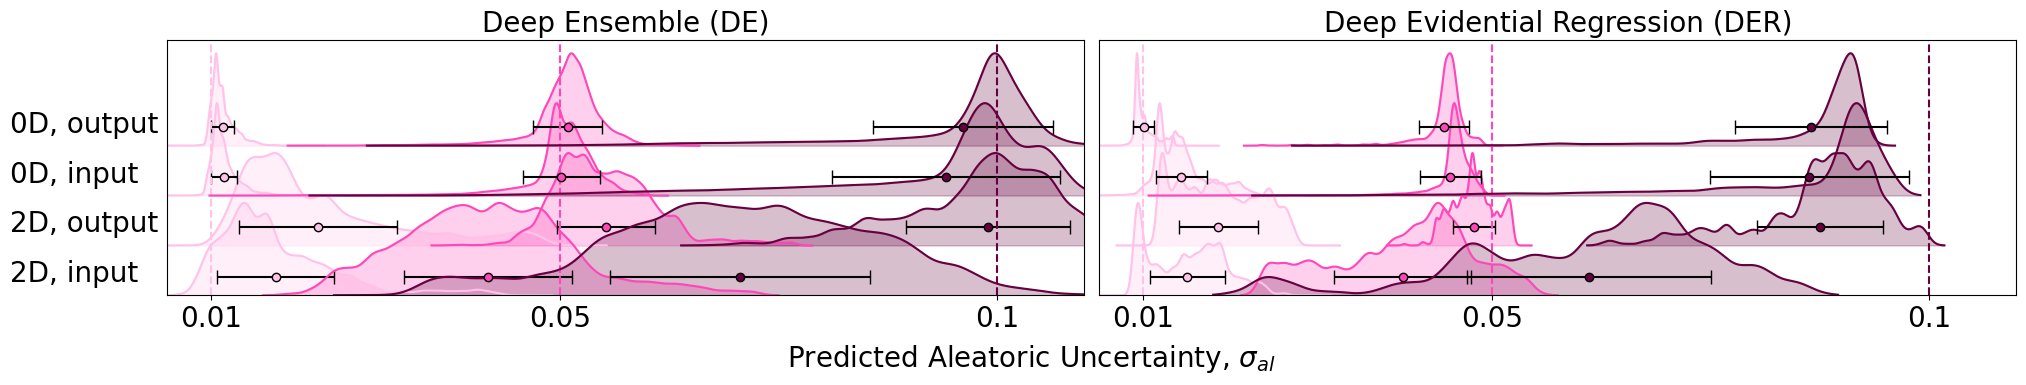

In [26]:
noise_list = ["low", "medium", "high"]
model_type = ["DE", "DER"]
inject_type_list = ["output", "input"]
data_dim_list = ["0D", "2D"]

fig, axes = plt.subplots(1, len(model_type), figsize=(20, 4))
axes = axes.flatten()
index = 0

sigma_y_lookup = {'low': 0.01, 'medium': 0.05, 'high': 0.10}
color_noise = ['#FFC2E8', '#FF47B9', '#66003F']#'#B80071']
#color_noise = ['#C5C0EC', '#6F62D0', '#3C2F9D']

x_limits = {
    "low": (0, 0.05),
    "medium": (0, 0.1),
    "high": (0, 0.12)
}


for m, model in enumerate(model_type):
    ax = axes[index]
    for n, noise in enumerate(noise_list):
        
        y_offset = 0  # Initialize a consistent y_offset
        kde_max = 0  # Track the maximum y-value across all KDE plots
        
        # Collect KDE data to plot
        kde_data = []
        color_twerk = 0
        for j, dim in enumerate(data_dim_list):
            for i, inject_type in enumerate(inject_type_list):
                u_al_data = mega_dict[noise][model][dim][inject_type]
                
                
                # Stack the DEs
                if model == "DE":
                    try:
                        combined_array = np.concatenate(u_al_data)
                    except ValueError:
                        continue
                elif model == "DER":
                    combined_array = u_al_data
                kde_data.append((combined_array, f"{dim}, {inject_type}"))
        # plot kdes in reverse order
        for combined_array, label in reversed(kde_data):
            try:
                # compute kde
                kde = gaussian_kde(combined_array, bw_method=0.1)  # Adjust bw_method as needed
            except ValueError:
                continue
            # define range of x values
            if noise == "low":
                x = np.linspace(min(combined_array) - 0.005, max(combined_array) + 0.005, 1000)
            else:
                x = np.linspace(min(combined_array) - 0.002, max(combined_array) + 0.002, 1000)
            # evaluate kde over x values
            y = kde(x)
            # normalize
            max_height = 0.5  # maximum height
            y_normalized = (y / y.max()) * max_height
            
            # now plot
            ax.fill_between(x,
                            y_offset,
                            y_normalized + y_offset,
                            color=color_noise[n],
                            alpha=0.25
                           )
            ax.plot(x, y_normalized + y_offset, color=color_noise[n], label=label)
            if n == 0 and m == 0:
                ax.annotate(label, xy=(-0.013, y_offset+0.07), size=20, annotation_clip=False)
            ax.scatter(
                np.mean(combined_array), y_offset + 0.1,
                color=color_noise[n], edgecolor='black', zorder=100)
            ax.errorbar(
                np.mean(combined_array), y_offset + 0.1,
                xerr = np.std(combined_array),
                color='black', capsize=5)
            y_offset += 0.27
        ax.set_yticks([])
        ax.set_ylim(0, y_offset+0.3)
        # set x-axis limits after plotting
        ax.set_xlim(x_limits[noise])
        # add vertical line indicating sigma_y for reference
        if noise == "low":
            ax.axvline(x=0.01, color=color_noise[n], ls='--')
        elif noise == "medium":
            ax.axvline(x=0.05, color=color_noise[n], ls='--')
        elif noise == "high":
            ax.axvline(x=0.10, color=color_noise[n], ls='--')
        ax.set_xticks([0.01, 0.05, 0.1])
        ax.set_xticklabels([0.01, 0.05, 0.10])
        ax.legend().remove()  # Remove the legend from all other subplots
        ax.set_yticklabels([])
    index += 1

axes[0].set_xlim([0.005, 0.11])
axes[1].set_xlim([0.005, 0.11])
axes[0].tick_params(axis='both', which='major', labelsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=20)
axes[0].set_title('Deep Ensemble (DE)', size=20)
axes[1].set_title('Deep Evidential Regression (DER)', size=20)
fig.supxlabel(r'Predicted Aleatoric Uncertainty, $\sigma_{al}$', size=20, y=0.05)
plt.tight_layout()
#plt.show()

plt.savefig(
    f'../../../Desktop/sigma_in_sigma_out_ridgeplot_ensemble_two_panel_noise_color_{n_models}_uniform.png',
    dpi=1000,
    bbox_inches='tight')

In [9]:
print('done')

done
